In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

# Load athlete data (from Drive or Colab upload)
athletes = pd.read_csv("/content/drive/MyDrive/olympic-medal-analysis/data/athlete_events.csv")

# Load NOC regions directly from GitHub (working link)
regions = pd.read_csv("/content/drive/MyDrive/olympic-medal-analysis/data/noc_regions.csv")

# Merge datasets
df = athletes.merge(regions, how='left', on='NOC')
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Check missing values
print(df.isnull().sum())

# Drop rows where Medal info is missing (for medal analysis only)
medal_df = df.dropna(subset=["Medal"])


ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
notes     264696
dtype: int64


Exploratory Data Analysis


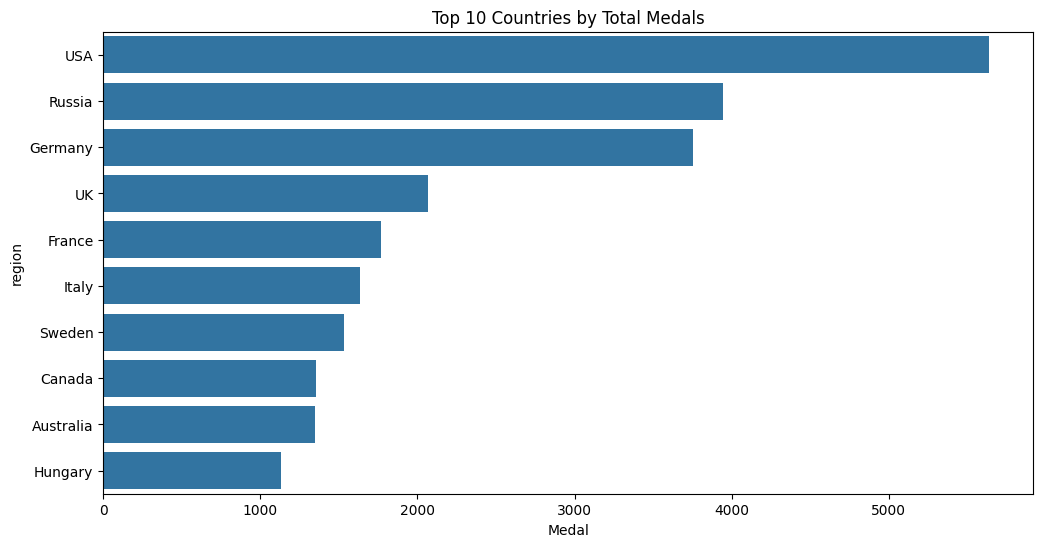

In [9]:

# Medal Tally by Country
medal_tally = medal_df.groupby("region")["Medal"].count().reset_index()
medal_tally = medal_tally.sort_values(by="Medal", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="Medal", y="region", data=medal_tally.head(10))
plt.title("Top 10 Countries by Total Medals")
plt.show()


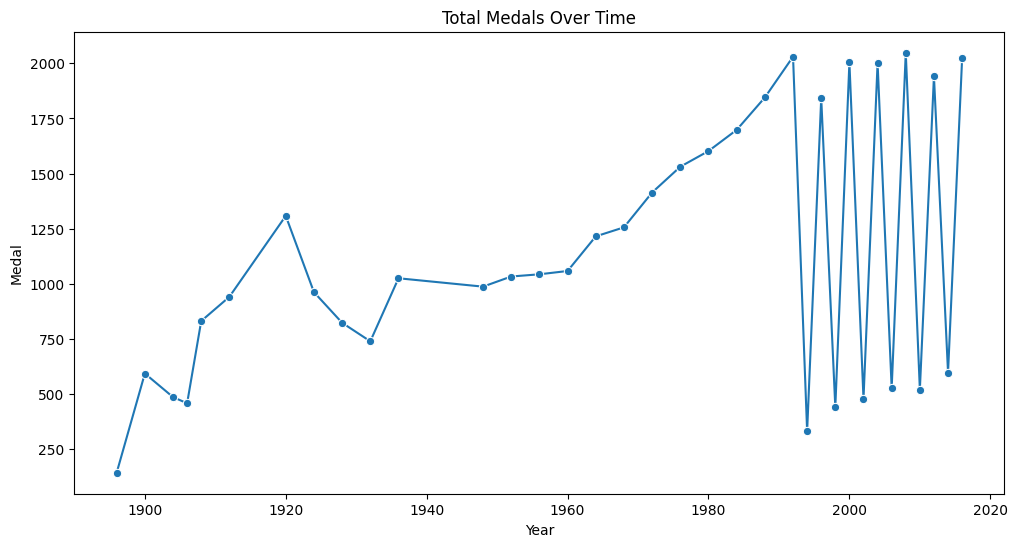

In [10]:
# (b) Medals Over Time
medals_over_time = medal_df.groupby("Year")["Medal"].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Medal", data=medals_over_time, marker="o")
plt.title("Total Medals Over Time")
plt.show()


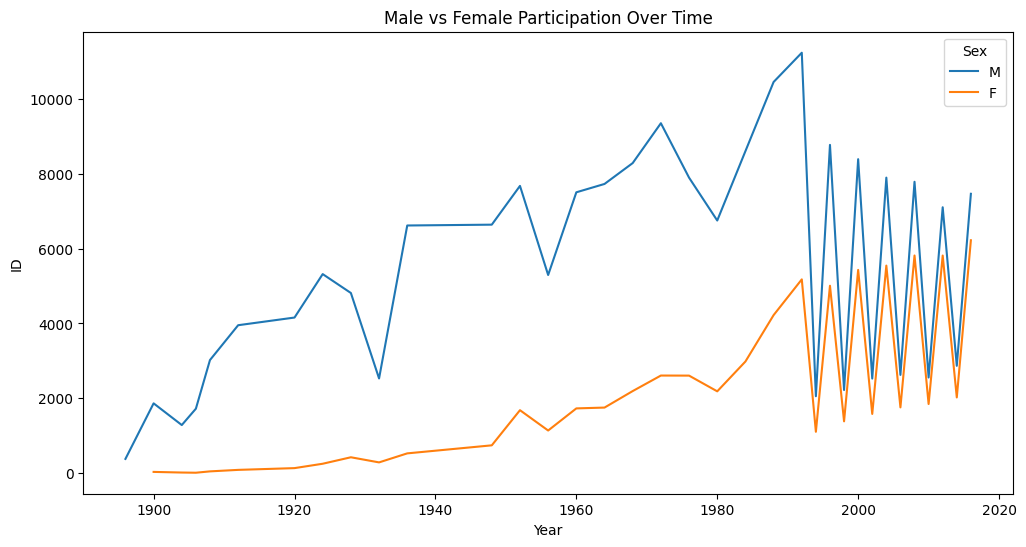

In [11]:
# Gender Participation
gender_count = df.groupby(["Year", "Sex"])["ID"].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="ID", hue="Sex", data=gender_count)
plt.title("Male vs Female Participation Over Time")
plt.show()


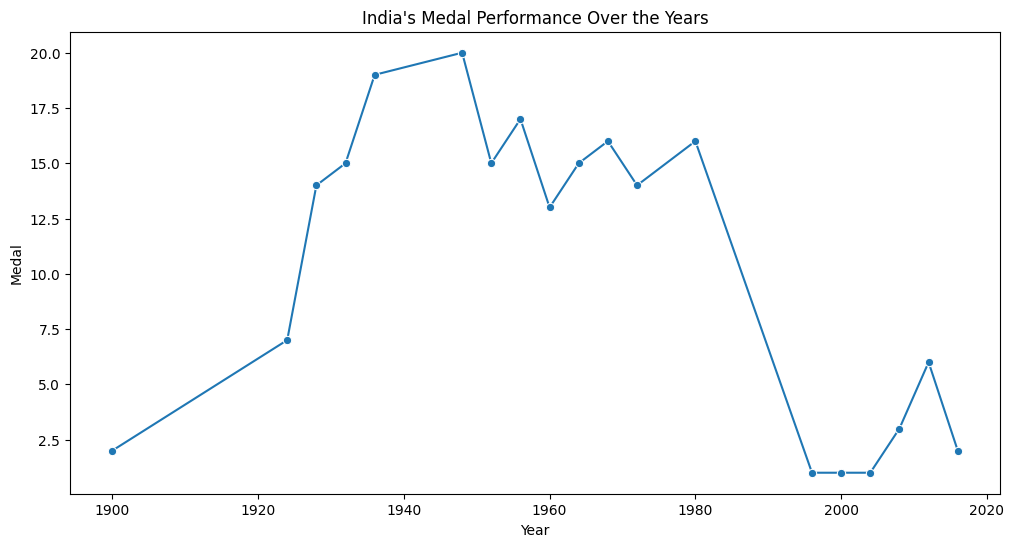

In [12]:
# India's Performance
india = medal_df[medal_df["region"] == "India"]

india_medals = india.groupby("Year")["Medal"].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Medal", data=india_medals, marker="o")
plt.title("India's Medal Performance Over the Years")
plt.show()


Saved processed Data

In [13]:
df.to_csv("cleaned_olympics.csv", index=False)
